## To find spark in this instance

In [1]:
import findspark
findspark.init()

## Creating spark context and session and reading data

In [3]:
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
import pandas as pd
#sc.stop()
sc = SparkContext('local')
spark = SparkSession(sc)
data = spark.read.csv('wdbcTrain.csv', header = False, inferSchema = True)
#data.printSchema()

## Changing columns names as per wdbc.names

In [4]:
oldColumns = data.schema.names
newColumns = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

df = data.toDF(*newColumns)
#df.printSchema()

In [5]:
import pandas as pd
pd.DataFrame(df.take(5), columns=df.columns)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Summary of data

In [6]:
df.describe().toPandas()

,summary,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,count,569,569,569,569,569,569,569,569,569,...,569,569,569,569,569,569,569,569,569,569
1,mean,3.0371831432337433E7,None,14.127291739894563,19.28964850615117,91.96903339191566,654.8891036906857,0.096360281195079,0.10434098418277686,0.08879931581722322,...,16.269189806678394,25.677223198594014,107.2612126537786,880.5831282952545,0.13236859402460469,0.25426504393673144,0.27218848330404205,0.11460622319859404,0.29007557117750454,0.08394581722319855
2,stddev,1.2502058561222367E8,None,3.5240488262120793,4.301035768166948,24.2989810387549,351.9141291816529,0.014064128137673616,0.0528127579325122,0.07971980870789354,...,4.833241580469323,6.1462576230383235,33.602542269036356,569.3569926699494,0.022832429404835465,0.157336488913742,0.20862428060813235,0.06573234119594208,0.06186746753751871,0.01806126734889399
3,min,8670,B,6.981,9.71,43.79,143.5,0.05263,0.01938,0.0,...,7.93,12.02,50.41,185.2,0.07117,0.02729,0.0,0.0,0.1565,0.05504
4,max,911320502,M,28.11,39.28,188.5,2501.0,0.1634,0.3454,0.4268,...,36.04,49.54,251.2,4254.0,0.2226,1.058,1.252,0.291,0.6638,0.2075


## Feature selection ( Here I am using correlation concept to drop columns which are highly correlated)

In [7]:
from pyspark.mllib.stat import Statistics
col_names = df.columns[2:]
features = df.rdd.map(lambda row: row[2:])
corr_mat=Statistics.corr(features, method="pearson")
corr_df = pd.DataFrame(corr_mat)
corr_df.index, corr_df.columns = col_names, col_names

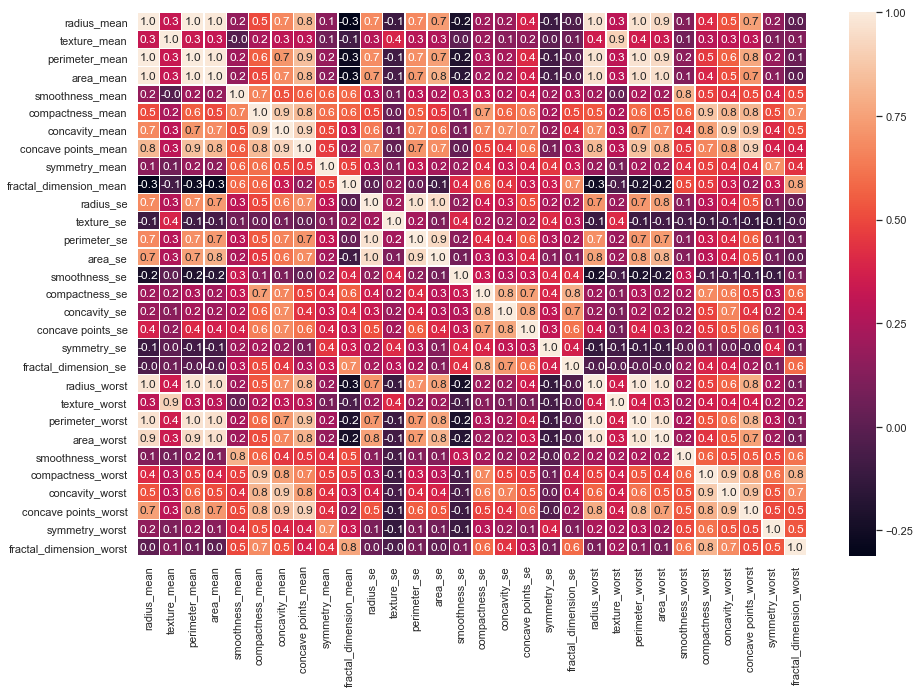

In [9]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(corr_df,annot=True, linewidths=.5, fmt= '.1f',xticklabels=corr_df.columns.values,yticklabels=corr_df.columns.values)

## Notes: 

## Dropping highly correlated features/ attributes

In [11]:
drop_list = ['id','perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst','concavity_worst']
df_1=df.select([column for column in df.columns if column not in drop_list])
#df_1.printSchema()

## Correlation Matrix after dropping columns

In [12]:
from pyspark.mllib.stat import Statistics
col_names = df_1.columns[1:]
features_1 = df_1.rdd.map(lambda row: row[1:])
corr_mat_1=Statistics.corr(features_1, method="pearson")
corr_df_1 = pd.DataFrame(corr_mat_1)
corr_df_1.index, corr_df_1.columns = col_names, col_names

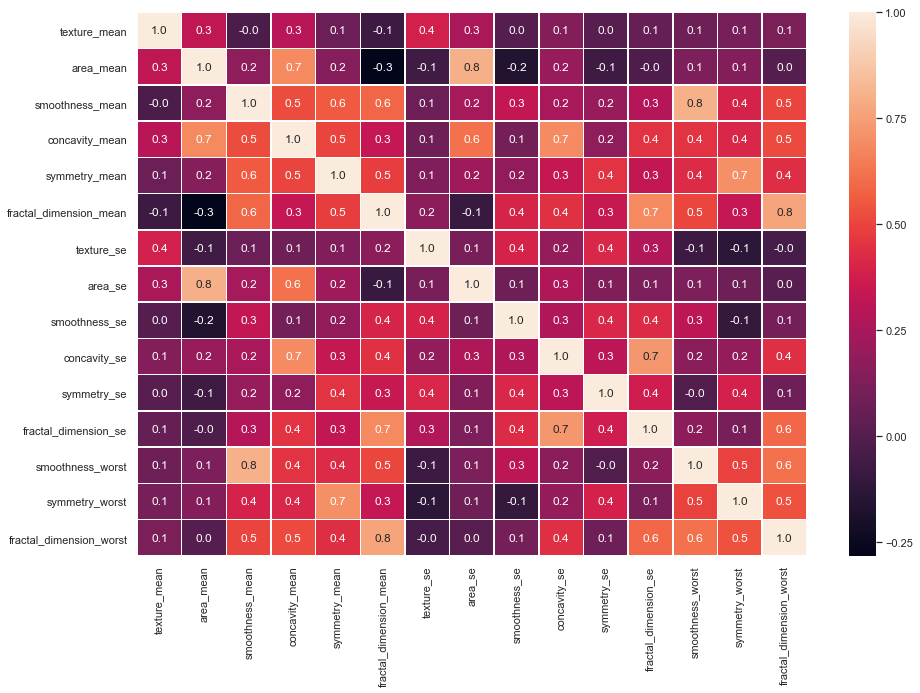

In [13]:
sns.heatmap(corr_df_1,annot=True, linewidths=.5, fmt= '.1f',xticklabels=corr_df_1.columns.values,yticklabels=corr_df_1.columns.values)

## Changing Labels to 1(=M) and 0(=B)

In [14]:
from pyspark.sql.types import DoubleType
from pyspark.sql.functions import UserDefinedFunction

label_map = {'M':1.0, 'B':0.0}
toNum = UserDefinedFunction(lambda k: label_map[k], DoubleType())
df_2 = df_1.withColumn('diagnosis', toNum(df_1['diagnosis'])).cache()

## Assumption 1

## Data with Train:Test split= 0.7:0.3 (seed=200)

In [15]:
training_data_1, testing_data_1 = df_2.randomSplit([0.7, 0.3],seed=200)

##  Saving the files to reuse if required

In [16]:
training_data_1.toPandas().to_csv("COPY_nobin_train_org_200.csv", header=False,index=False)
testing_data_1.toPandas().to_csv("COPY_nobin_test_org_200.csv", header=False,index=False)

## Binning train data in spark environment using QuantileDiscretizer with numBuckets=2

In [17]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import QuantileDiscretizer

indexers = [QuantileDiscretizer(numBuckets=2, inputCol=column, outputCol=column+"_bin").fit(training_data_1) for column in list(training_data_1.columns[1:])]

binPipeline = Pipeline(stages=indexers)
df_3 = binPipeline.fit(training_data_1).transform(training_data_1)

In [20]:
drop_list1 = training_data_1.columns[1:]
df_4=df_3.select([column for column in df_3.columns if column not in drop_list1])
pd.DataFrame(df_4.take(5), columns=df_4.columns)

,diagnosis,texture_mean_bin,area_mean_bin,smoothness_mean_bin,concavity_mean_bin,symmetry_mean_bin,fractal_dimension_mean_bin,texture_se_bin,area_se_bin,smoothness_se_bin,concavity_se_bin,symmetry_se_bin,fractal_dimension_se_bin,smoothness_worst_bin,symmetry_worst_bin,fractal_dimension_worst_bin
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
2,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0


##  Saving binned train dataset in csv format and will be read using spark context to train the model

In [22]:
df_4.toPandas().to_csv("COPY_binned_train_200.csv", header=False,index=False)

## Transforming test data to binned form in spark environment by model which is fit by trained data

In [23]:
df_5 = binPipeline.fit(training_data_1).transform(testing_data_1)

In [24]:
drop_list1 = training_data_1.columns[1:]
df_6=df_5.select([column for column in df_5.columns if column not in drop_list1])
pd.DataFrame(df_6.take(5), columns=df_6.columns)

,diagnosis,texture_mean_bin,area_mean_bin,smoothness_mean_bin,concavity_mean_bin,symmetry_mean_bin,fractal_dimension_mean_bin,texture_se_bin,area_se_bin,smoothness_se_bin,concavity_se_bin,symmetry_se_bin,fractal_dimension_se_bin,smoothness_worst_bin,symmetry_worst_bin,fractal_dimension_worst_bin
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


##  Saving binned test dataset in csv format and will be read using spark context and used for  calculating accuracy and confusion matrix

In [25]:
df_6.toPandas().to_csv("COPY_binned_test_200.csv", header=False,index=False)

## References

1)  https://machinelearningmastery.com/implement-decision-tree-algorithm-scratch-python/

2)  https://spark.apache.org/docs/2.2.0/mllib-decision-tree.html

3)  https://spark.apache.org/docs/2.2.0/mllib-evaluation-metrics.html

4)  https://mapr.com/blog/churn-prediction-pyspark-using-mllib-and-ml-packages/

5)  https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/kernels